<a href="https://colab.research.google.com/github/ZenonNoPro/KmeansClustering/blob/main/KMeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[0.46074898 2.4583981 ]
[-1.27685436 -0.9172929 ]
[ 1.01952118 -1.4815762 ]
[-1.36964468  1.42233178]
[1.14108551 0.6231873 ]


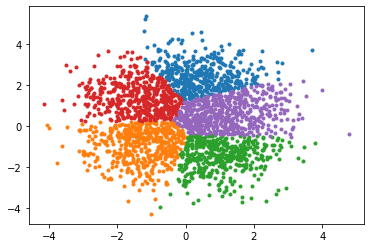

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

np.random.seed(17)

#ex dt
numClusters = 5
numPoints = 500
Means = np.array([[0, 2], [1, 1], [1, -1], [-1, -1], [-1, 1]])
Cov = np.array([[1, 0], [0, 1]])

X_0 = np.random.multivariate_normal(Means[0], Cov, size = numPoints)
X_1 = np.random.multivariate_normal(Means[1], Cov, size = numPoints)
X_2 = np.random.multivariate_normal(Means[2], Cov, size = numPoints)
X_3 = np.random.multivariate_normal(Means[3], Cov, size = numPoints)
X_4 = np.random.multivariate_normal(Means[4], Cov, size = numPoints)

X = np.concatenate((X_0, X_1, X_2, X_3, X_4), axis = 0)
labels = []
for i in range(numClusters):
  labels = [i] * numPoints
labels = np.array(labels)

#
def init(X):
  idx = np.random.choice(X.shape[0], size = numClusters, replace = False)
  return X[idx]

def find_labels(X, cntr):
  dis = cdist(cntr, X)
  tmp = np.argmin(dis, axis = 0)
  return tmp

def find_centers(X, lb):
  cntr = np.zeros((numClusters, X.shape[1]))
  for i in range(numClusters):
    X_tmp = X[lb == i, :]
    cntr[i] = np.mean(X_tmp, axis = 0)
  return cntr

def check_ans(centers, new_centers):
  return (set(tuple(a) for a in centers) == set(tuple(a) for a in new_centers))

def KMnClustering(X, numClusters):
  centers = init(X)
  while(True):
    labels = find_labels(X, centers)
    new_centers = find_centers(X, labels)
    if(check_ans(centers, new_centers) == True):
      break
    centers = new_centers
  return (labels, centers)

#solve
(labels, centers) = KMnClustering(X, numClusters)
for x in centers:
  print(x)

for i in range(numClusters):
    X_tmp = X[labels == i, :]
    plt.plot(X_tmp[:, 0], X_tmp[:, 1], 'o', markersize = 3)
